In [1]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 32.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf

In [3]:
df = yf.download(tickers='XRP-USD')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.217911,0.221791,0.214866,0.217488,0.217488,147916992
2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992
2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008
2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008
2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000
...,...,...,...,...,...,...
2022-05-06,0.598832,0.613482,0.591612,0.602570,0.602570,2003273389
2022-05-07,0.602561,0.603840,0.573928,0.582347,0.582347,1250412025
2022-05-08,0.582399,0.582634,0.562757,0.566527,0.566527,1505054300


In [5]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


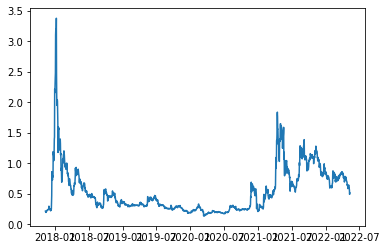

In [6]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [7]:
# Train test split

to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

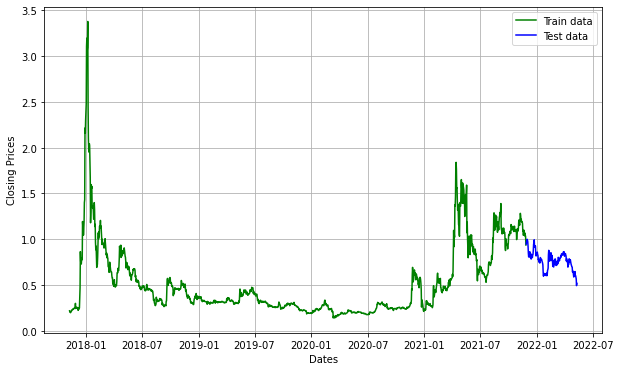

In [8]:
#split data into train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test data')
plt.legend()

In [9]:
model_predictions = []
n_test_obser = len(testing_data)

In [10]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

In [11]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1642
Model:                 ARIMA(4, 1, 0)   Log Likelihood                2287.550
Method:                       css-mle   S.D. of innovations              0.060
Date:                Tue, 10 May 2022   AIC                          -4563.099
Time:                        15:44:08   BIC                          -4530.677
Sample:                             1   HQIC                         -4551.076
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.002      0.092      0.926      -0.003       0.004
ar.L1.D.y      0.0188      0.025      0.763      0.446      -0.030       0.067
ar.L2.D.y      0.0332      0.025      1.349      0.1

In [13]:
#len(testing_data) (to remove error)

165

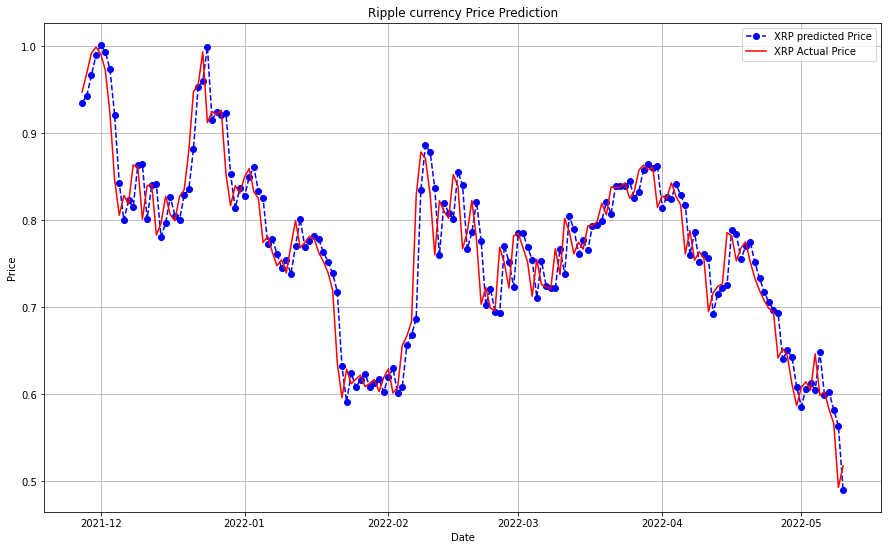

In [14]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'XRP predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'XRP Actual Price')

plt.title('Ripple currency Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
# report performance
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+str(mape)) 

# Around 3.8% MAPE(Mean Absolute Percentage Error) implies the model is about 96.2% accurate in predicting the test set observations.

MAPE: 0.032818346999736354
